In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
gazp = pd.read_csv("./data/GAZP_101001_171001.txt")
sber = pd.read_csv("./data/SBER_101001_171001.txt")

In [5]:
gazp

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20101001,0,160.54,60923751
1,GAZP,D,20101004,0,161.99,61902787
2,GAZP,D,20101005,0,162.44,61546943
3,GAZP,D,20101006,0,163.00,67921495
4,GAZP,D,20101007,0,162.49,43529081
...,...,...,...,...,...,...
1753,GAZP,D,20170926,0,123.03,25695940
1754,GAZP,D,20170927,0,123.36,22485510
1755,GAZP,D,20170928,0,122.50,22610060
1756,GAZP,D,20170929,0,122.20,17182380


In [6]:
sber

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617
...,...,...,...,...,...,...
1753,SBER,D,20170926,0,192.54,82022480
1754,SBER,D,20170927,0,193.70,54969700
1755,SBER,D,20170928,0,191.96,39061930
1756,SBER,D,20170929,0,192.33,26264260


In [7]:
sber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [8]:
gazp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [9]:
data = gazp.merge(sber, on="<DATE>")
data

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20101001,0,160.54,60923751,SBER,D,0,89.09,332429890
1,GAZP,D,20101004,0,161.99,61902787,SBER,D,0,89.88,194032721
2,GAZP,D,20101005,0,162.44,61546943,SBER,D,0,91.97,198775753
3,GAZP,D,20101006,0,163.00,67921495,SBER,D,0,91.20,210406027
4,GAZP,D,20101007,0,162.49,43529081,SBER,D,0,90.40,145137617
...,...,...,...,...,...,...,...,...,...,...,...
1753,GAZP,D,20170926,0,123.03,25695940,SBER,D,0,192.54,82022480
1754,GAZP,D,20170927,0,123.36,22485510,SBER,D,0,193.70,54969700
1755,GAZP,D,20170928,0,122.50,22610060,SBER,D,0,191.96,39061930
1756,GAZP,D,20170929,0,122.20,17182380,SBER,D,0,192.33,26264260


In [10]:
Y_gazp = data["<CLOSE>_x"]
Y_sber = data["<CLOSE>_y"]
X_gazp = gazp.drop("<CLOSE>", axis=1)
X_sber = sber.drop("<CLOSE>", axis=1)

In [11]:
X_sber

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,SBER,D,20101001,0,332429890
1,SBER,D,20101004,0,194032721
2,SBER,D,20101005,0,198775753
3,SBER,D,20101006,0,210406027
4,SBER,D,20101007,0,145137617
...,...,...,...,...,...
1753,SBER,D,20170926,0,82022480
1754,SBER,D,20170927,0,54969700
1755,SBER,D,20170928,0,39061930
1756,SBER,D,20170929,0,26264260


In [12]:
X_gazp

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,GAZP,D,20101001,0,60923751
1,GAZP,D,20101004,0,61902787
2,GAZP,D,20101005,0,61546943
3,GAZP,D,20101006,0,67921495
4,GAZP,D,20101007,0,43529081
...,...,...,...,...,...
1753,GAZP,D,20170926,0,25695940
1754,GAZP,D,20170927,0,22485510
1755,GAZP,D,20170928,0,22610060
1756,GAZP,D,20170929,0,17182380


In [13]:
class Regression:
    
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        """predict by factor"""
        return self.b0 + self.b1 * x

    def error(self, X, Y):  
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
        
    def GDM(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps = 5000):
        """Метод градиентного спуска"""
        steps, errors = [], []
        dJ = 1
        step = 0
        
        #errs
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        
        #restrict
        while dJ > accuracy and (step < max_steps):
            
            dJ0 = sum(self.predict(X)-Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            old_err = new_err
            new_err = self.error(X, Y)
            
            dJ = abs(old_err - new_err)
            
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

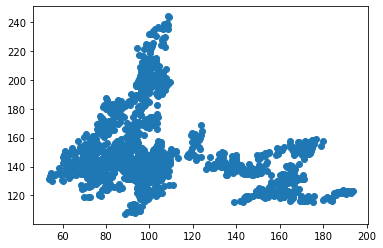

In [14]:
plt.figure()
plt.scatter(Y_sber, Y_gazp)
plt.show()

In [27]:
model = Regression()

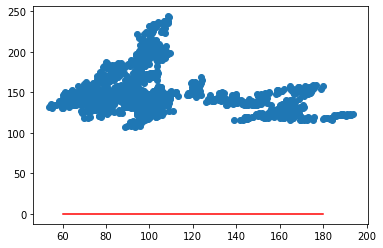

In [28]:
X0 = np.linspace(60, 180, 100)
Y0 = model.predict(X0)
plt.figure()
plt.scatter(Y_sber, Y_gazp)
plt.plot(X0, Y0, 'r')
plt.show()

In [29]:
steps, errors = model.GDM(Y_sber, Y_gazp)
model.predict(Y_sber)

0       118.544521
1       119.595544
2       122.376099
3       121.351684
4       120.287357
           ...    
1753    256.175317
1754    257.718591
1755    255.403679
1756    255.895931
1757    256.787305
Name: <CLOSE>_y, Length: 1758, dtype: float64

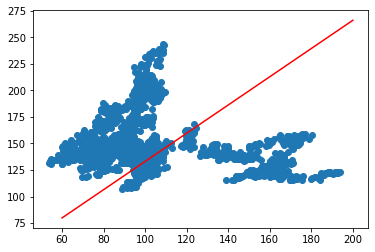

In [30]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_sber, Y_gazp)
plt.plot(X0, Y0, "r")
plt.show()

In [31]:
print(f"{model.error(Y_sber, Y_gazp)=}")

model.error(Y_sber, Y_gazp)=1369.5910762185074


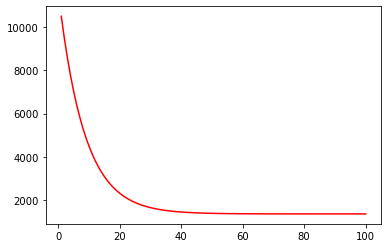

In [32]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()

In [ ]:
#Доп задания

In [33]:
mvid = pd.read_csv("./data/MVID_101001_171001.txt")

In [34]:
data = gazp.merge(mvid, on="<DATE>")
data

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20101001,0,160.54,60923751,MVID,D,0,194.38,19406
1,GAZP,D,20101004,0,161.99,61902787,MVID,D,0,190.00,31039
2,GAZP,D,20101005,0,162.44,61546943,MVID,D,0,187.00,17651
3,GAZP,D,20101006,0,163.00,67921495,MVID,D,0,190.04,36482
4,GAZP,D,20101007,0,162.49,43529081,MVID,D,0,199.85,204248
...,...,...,...,...,...,...,...,...,...,...,...
1753,GAZP,D,20170926,0,123.03,25695940,MVID,D,0,425.00,73570
1754,GAZP,D,20170927,0,123.36,22485510,MVID,D,0,424.10,77680
1755,GAZP,D,20170928,0,122.50,22610060,MVID,D,0,423.10,75540
1756,GAZP,D,20170929,0,122.20,17182380,MVID,D,0,416.10,90430


In [35]:
Y_gazp = data["<CLOSE>_x"]
Y_mvid = data["<CLOSE>_y"]
X_gazp = gazp.drop("<CLOSE>", axis=1)
X_mvid = mvid.drop("<CLOSE>", axis=1)

In [36]:
X_mvid

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,MVID,D,20101001,0,19406
1,MVID,D,20101004,0,31039
2,MVID,D,20101005,0,17651
3,MVID,D,20101006,0,36482
4,MVID,D,20101007,0,204248
...,...,...,...,...,...
1753,MVID,D,20170926,0,73570
1754,MVID,D,20170927,0,77680
1755,MVID,D,20170928,0,75540
1756,MVID,D,20170929,0,90430


In [37]:
Y_mvid

0       194.38
1       190.00
2       187.00
3       190.04
4       199.85
         ...  
1753    425.00
1754    424.10
1755    423.10
1756    416.10
1757    422.50
Name: <CLOSE>_y, Length: 1758, dtype: float64

In [43]:
newmodel = Regression()

In [44]:
steps, errors = newmodel.GDM(Y_gazp, Y_mvid)
newmodel.predict(Y_gazp)

0       269.627688
1       272.062850
2       272.818590
3       273.759066
4       272.902561
           ...    
1753    206.632575
1754    207.186784
1755    205.742482
1756    205.238655
1757    204.734828
Name: <CLOSE>_x, Length: 1758, dtype: float64

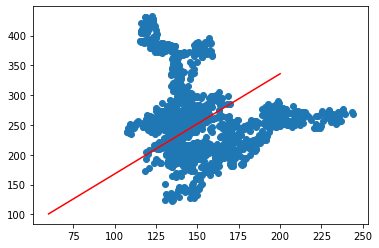

In [45]:
X0 = np.linspace(60, 200, 100)
Y0 = newmodel.predict(X0)

plt.figure()
plt.scatter(Y_gazp, Y_mvid)
plt.plot(X0, Y0, "r")
plt.show()

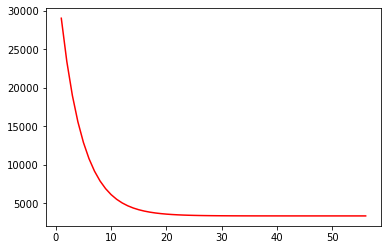

In [46]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()

In [ ]:
#3

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
X_train = np.array(data["<CLOSE>_x"]).reshape(-1, 1)
y_train = np.array(data["<CLOSE>_y"]).reshape(-1, 1)

In [51]:
linr = LinearRegression().fit(X_train, y_train)
linr.score(X_train, y_train)

0.039823671049979525

In [52]:
print(f"b0: {linr.coef_[0][0]}\nb1: {linr.intercept_[0]}")

b0: -0.5131962980904731
b1: 339.17566930352393
